In [10]:
!pip install Pillow matplotlib
!python.exe -m pip install --upgrade pip


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 660.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.8 MB 751.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.8 MB 722.1 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.8 MB 901.1 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 1.1 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.8 MB 1.2 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.8 MB 1.2 MB/s eta 0:00:02
   ------------ --------------------------- 0.6/1.8 MB 1.1 MB/s eta 0:00:02
   -------------- -------

2.1 Exercise - 1:

1. Read and display the image.
• Read the image using the Pillow library and display it.
• You can also use matplotlib to display the image.

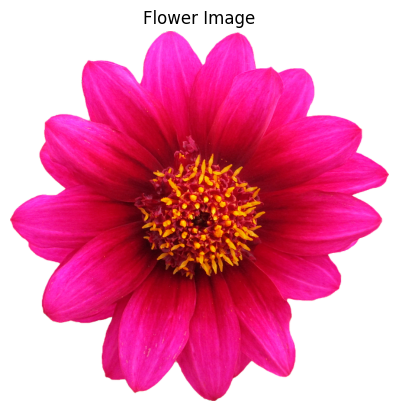

In [11]:
from PIL  import Image
import matplotlib.pyplot as plt

image = Image.open("flower.png")
image.show()

plt.imshow(image)
plt.axis("off")
plt.title("Flower Image")
plt.show()

2. Display only the top left corner of 100x100 pixels.
• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

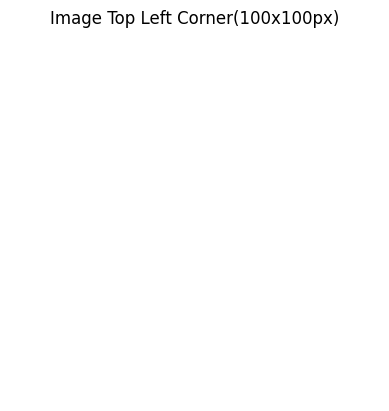

In [19]:
arr_image = np.array(image)
top_left_corner_pixels = arr_image[:100, :100]

plt.imshow(top_left_corner_pixels)
plt.axis("off")
plt.title("Image Top Left Corner(100x100px)")
plt.show()

3. Show the three color channels (R, G, B).
• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

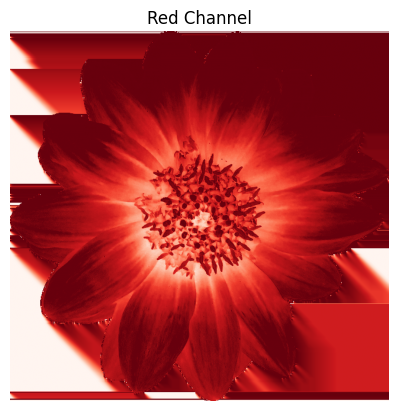

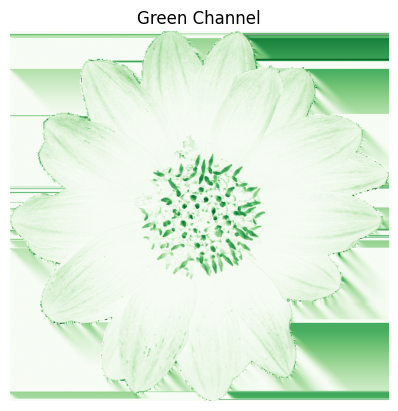

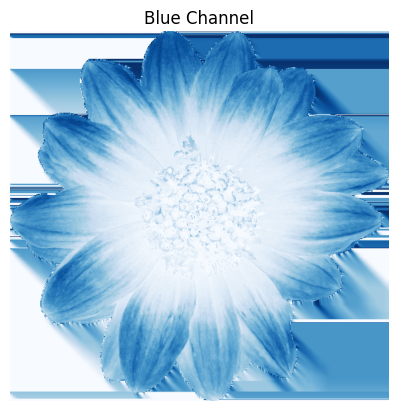

In [21]:
R = arr_image[:, :, 0]
G = arr_image[:, :, 1]
B = arr_image[:, :, 2]

#for red
plt.imshow(R, cmap="Reds")
plt.axis("off")
plt.title("Red Channel")
plt.show()

#for green
plt.imshow(G, cmap="Greens")
plt.axis("off")
plt.title("Green Channel")
plt.show()

#for blue
plt.imshow(B, cmap="Blues")
plt.axis("off")
plt.title("Blue Channel")
plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:
• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

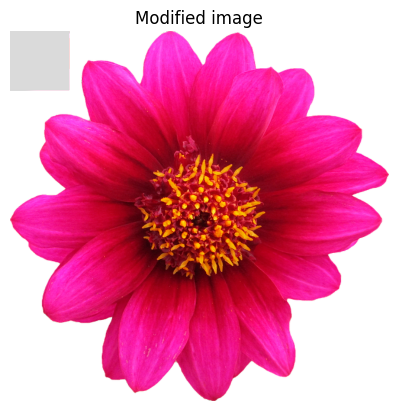

In [22]:
arr_image[:100, :100] = 210

plt.imshow(arr_image)
plt.axis("off")
plt.title("Modified image")
plt.show()

2.2 Exercise - 2:

1. Load and display a grayscale image.
• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

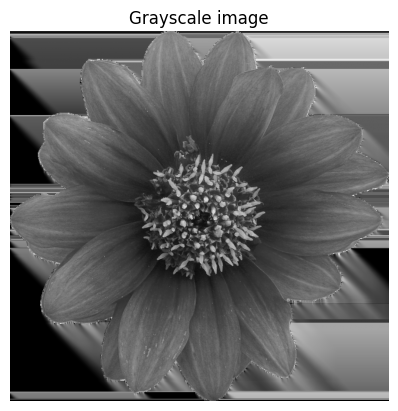

In [23]:
grayscale_img = image.convert("L")

plt.imshow(grayscale_img, cmap = "gray")
plt.axis("off")
plt.title("Grayscale image")
plt.show()

2. Extract and display the middle section of the image (150 pixels).
• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

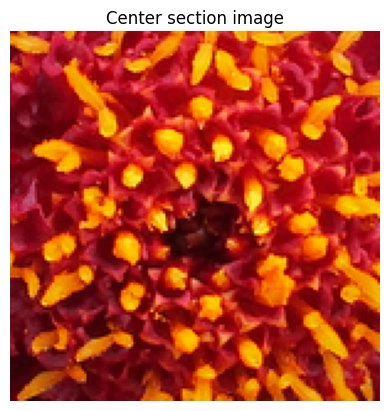

In [24]:
height, width, _ = arr_image.shape
row_start = (height // 2) - 75
row_end = (height // 2) + 75
col_start = (width // 2) - 75
col_end = (width // 2) + 75
center = arr_image[row_start:row_end, col_start:col_end]

plt.imshow(center)
plt.axis("off")
plt.title("Center section image")
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

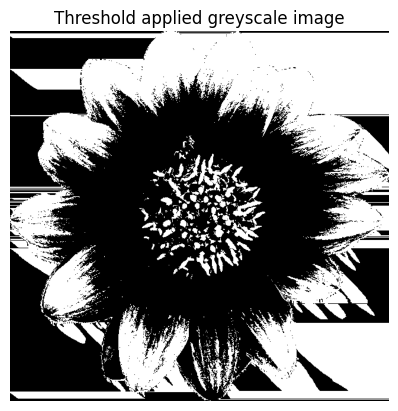

In [25]:
grayscale_arr = np.array(grayscale_img)
binary_img = np.where(grayscale_arr < 100, 0, 255)

plt.imshow(binary_img, cmap = "gray")
plt.axis("off")
plt.title("Threshold applied greyscale image")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.
• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

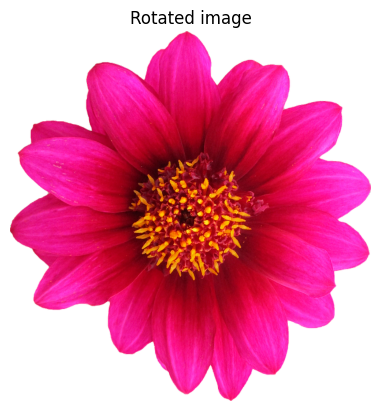

In [26]:
img_rotate = image.rotate(-90, expand = True)

plt.imshow(img_rotate)
plt.axis("off")
plt.title("Rotated image")
plt.show()

In [ ]:
5. Convert the grayscale image to an RGB image.
• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.

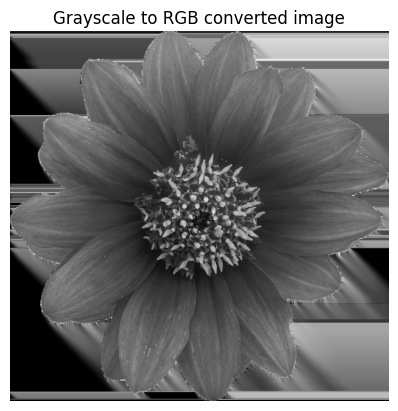

In [28]:
grayscale_arr = np.array(grayscale_img)
rgb_img = np.stack((grayscale_arr, grayscale_arr, grayscale_arr), axis = -1)

plt.imshow(rgb_img)
plt.axis("off")
plt.title("Grayscale to RGB converted image")
plt.show()

3 Image Compression and Decompression using PCA.
1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}
• Center the dataset - Standaridze the Data.
• Calculate the covaraince matrix of the Standaridze data.
2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.
• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.
• Identify the Principal Components with the help of cumulative Sum plot.
3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

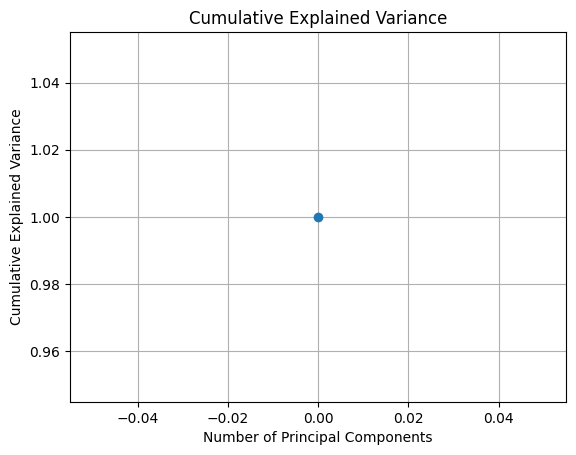

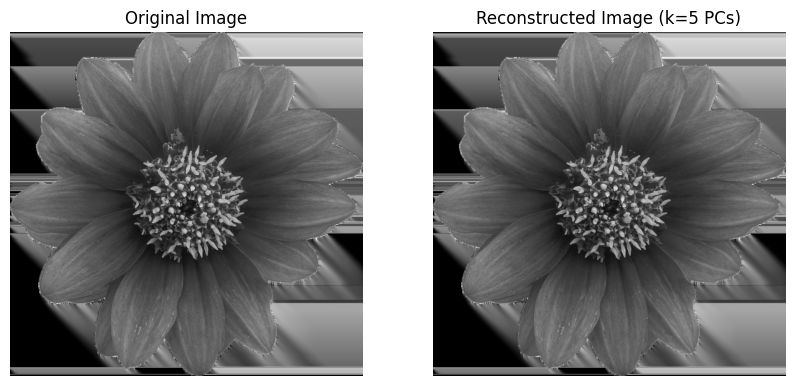

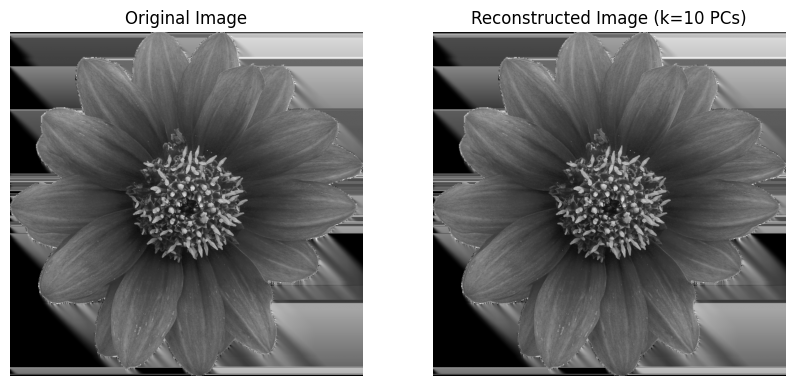

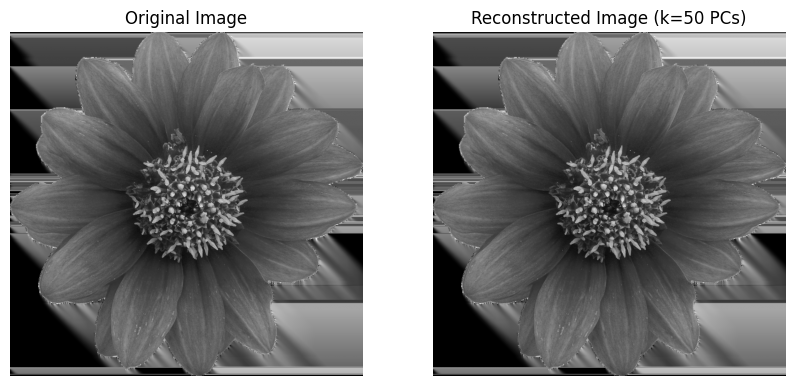

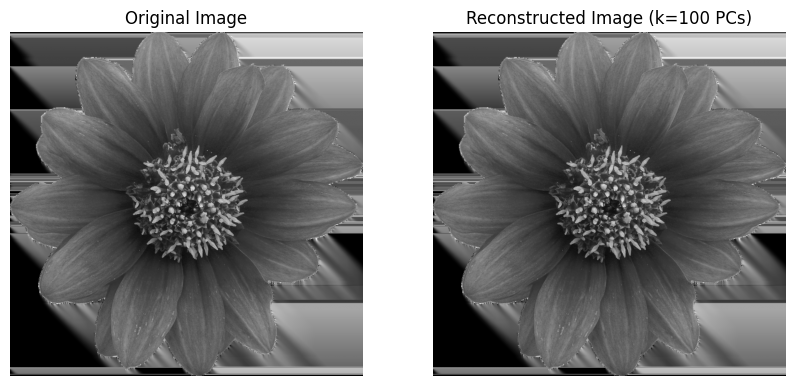

In [65]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image = Image.open("flower.png")
grayscale_img = image.convert("L")
arr_image = np.array(grayscale_img)
data_matrix = arr_image.reshape(-1, 1)

mean = np.mean(data_matrix, axis=0)
centered_data = data_matrix - mean
cov_matrix = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

indices_sorted = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[indices_sorted]
sorted_eigenvectors = eigenvectors[:, indices_sorted]

explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance)

plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

height, width = arr_image.shape  # Original image dimensions
k_values = [5, 10, 50, 100]

for k in k_values:
    selected_eigenvectors = sorted_eigenvectors[:, :k]
    compressed_data = np.dot(centered_data, selected_eigenvectors)
    reconstructed_data = np.dot(compressed_data, selected_eigenvectors.T) + mean
    reconstructed_image = reconstructed_data.reshape(height, width)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(arr_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"Reconstructed Image (k={k} PCs)")
    plt.axis('off')
    plt.show()